<a href="https://colab.research.google.com/github/abbyambita/Diagnosing-COVID-from-CT-Scan-Images/blob/main/visualize_attention_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [80]:
%cd "/content/gdrive/My Drive/CS 284 Mini-Project/Code/ViT-pytorch/"
%ls

/content/gdrive/.shortcut-targets-by-id/1eVFVz23F6ROX0s10Oe3tT9HVzr502iW2/CS 284 Mini-Project/Code/ViT-pytorch
checkpoint/  models/           saved_models/  utils/
img/         README.md         test.py        visualize_attention_map.ipynb
LICENSE      requirements.txt  train.py


In [4]:
!pip install ml-collections

     |████████████████████████████████| 92kB 8.2MB/s 


In [11]:
import typing
import io
import os

import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

from urllib.request import urlretrieve

from PIL import Image
from torchvision import transforms

from models.modeling import VisionTransformer, CONFIGS

from torchvision.utils import save_image

In [ ]:
# os.makedirs("attention_data", exist_ok=True)
# if not os.path.isfile("attention_data/ilsvrc2012_wordnet_lemmas.txt"):
#     urlretrieve("https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt", "attention_data/ilsvrc2012_wordnet_lemmas.txt")
# if not os.path.isfile("attention_data/ViT-B_16-224.npz"):
#     urlretrieve("https://storage.googleapis.com/vit_models/imagenet21k+imagenet2012/ViT-B_16-224.npz", "attention_data/ViT-B_16-224.npz")

# imagenet_labels = dict(enumerate(open('attention_data/ilsvrc2012_wordnet_lemmas.txt')))

In [ ]:
# Test Image
# img_url = "https://images.mypetlife.co.kr/content/uploads/2019/04/09192811/welsh-corgi-1581119_960_720.jpg"
# urlretrieve(img_url, "attention_data/img.jpg")

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)
# n_gpu = torch.cuda.device_count()

# Prepare Model


cuda


torch.Size([3, 224, 224])

### Reference
* [attention_flow](https://github.com/samiraabnar/attention_flow)
* [vit-keras](https://github.com/faustomorales/vit-keras)

img/noncovid-git/noncovid-git-1.png: Prediction Label and Attention Map for model sagan_resnet

0.76978 : noncovidimg/noncovid-git/noncovid-git-2.png: Prediction Label and Attention Map for model sagan_resnet

0.46056 : covidimg/noncovid-git/noncovid-git-3.png: Prediction Label and Attention Map for model sagan_resnet

0.57729 : covidimg/noncovid-git/noncovid-git-4.png: Prediction Label and Attention Map for model sagan_resnet

0.75715 : covidimg/noncovid-git/noncovid-git-5.png: Prediction Label and Attention Map for model sagan_resnet

0.95902 : noncovidimg/noncovid-git/noncovid-git-6.png: Prediction Label and Attention Map for model sagan_resnet

0.71831 : covidimg/noncovid-git/noncovid-git-7.png: Prediction Label and Attention Map for model sagan_resnet

0.47883 : covidimg/noncovid-git/noncovid-git-8.png: Prediction Label and Attention Map for model sagan_resnet

0.28394 : covidimg/noncovid-git/noncovid-git-1.png: Prediction Label and Attention Map for model sagan

0.96376 : noncovi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


img/noncovid-git/noncovid-git-5.png: Prediction Label and Attention Map for model acgan

0.89313 : noncovidimg/noncovid-git/noncovid-git-6.png: Prediction Label and Attention Map for model acgan

0.87996 : noncovidimg/noncovid-git/noncovid-git-7.png: Prediction Label and Attention Map for model acgan

0.85141 : noncovidimg/noncovid-git/noncovid-git-8.png: Prediction Label and Attention Map for model acgan

0.84045 : noncovidimg/noncovid-git/noncovid-git-1.png: Prediction Label and Attention Map for model bagan

0.74308 : noncovidimg/noncovid-git/noncovid-git-2.png: Prediction Label and Attention Map for model bagan

0.90440 : covidimg/noncovid-git/noncovid-git-3.png: Prediction Label and Attention Map for model bagan

0.85875 : covidimg/noncovid-git/noncovid-git-4.png: Prediction Label and Attention Map for model bagan

0.84018 : covidimg/noncovid-git/noncovid-git-5.png: Prediction Label and Attention Map for model bagan

0.86499 : noncovidimg/noncovid-git/noncovid-git-6.png: Predictio

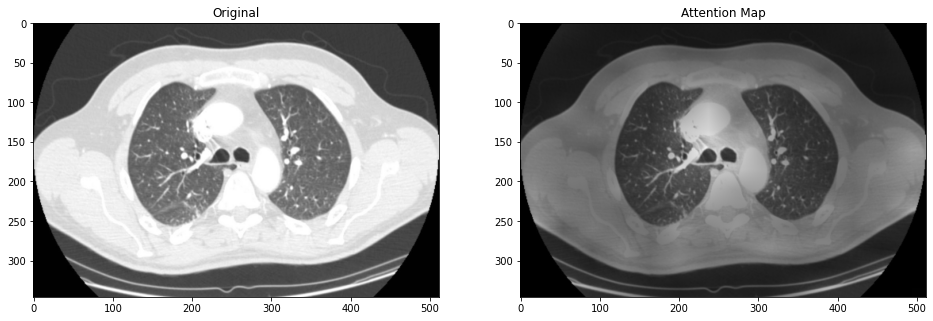

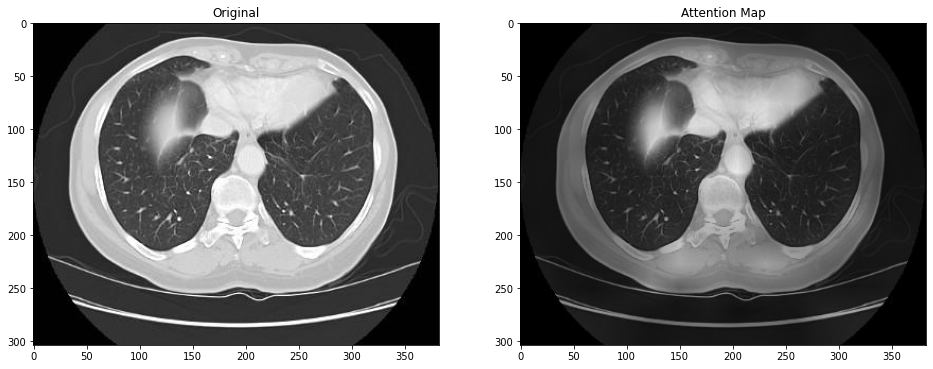

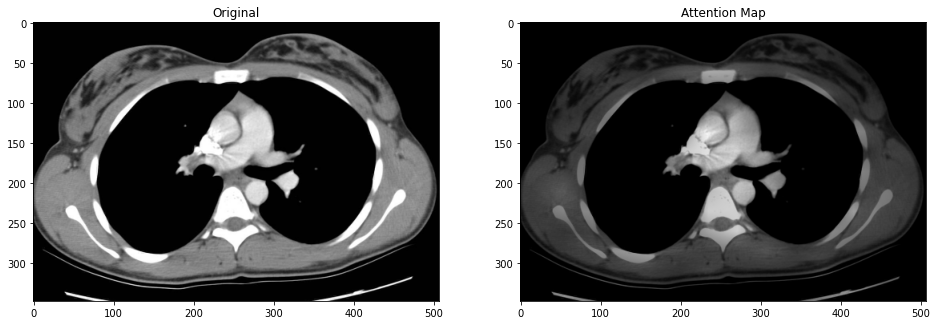

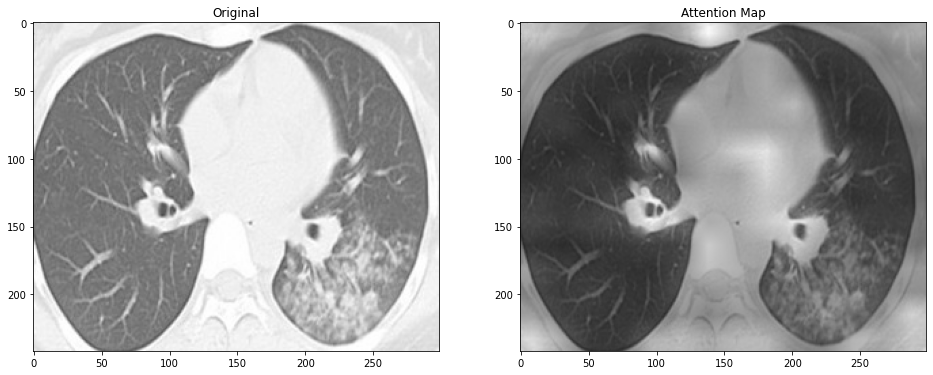

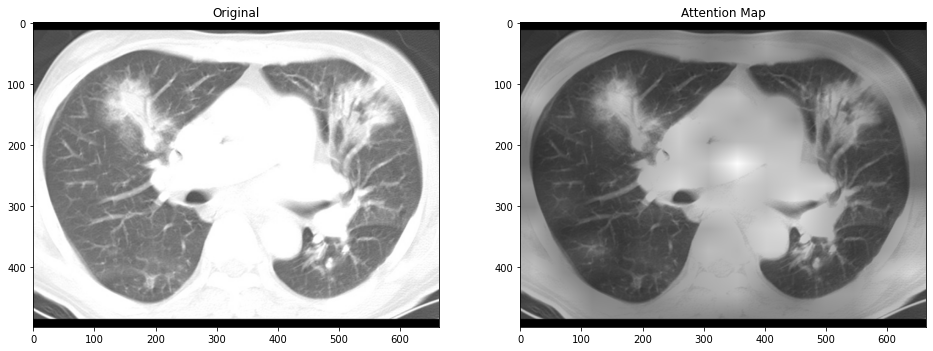

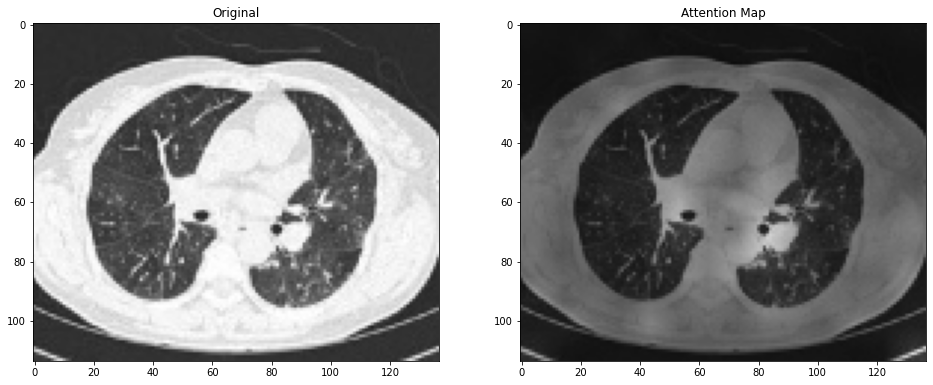

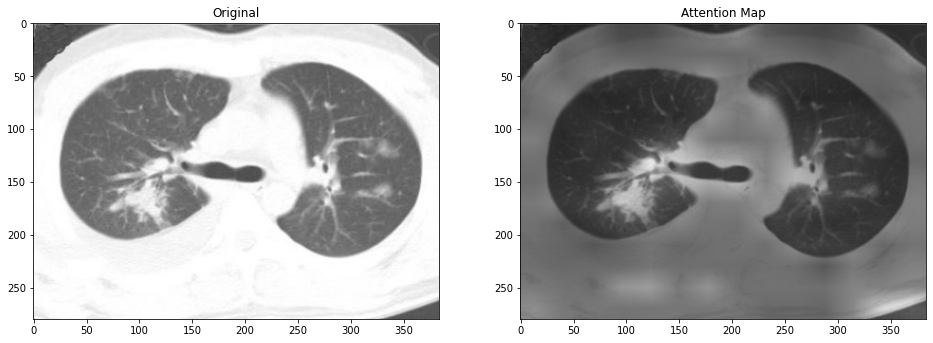

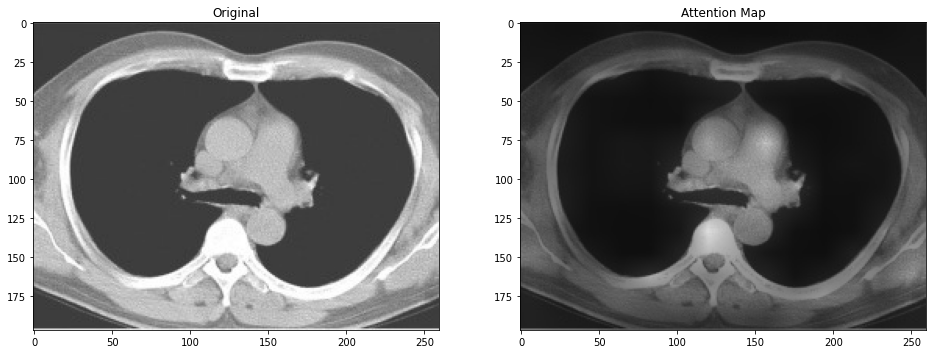

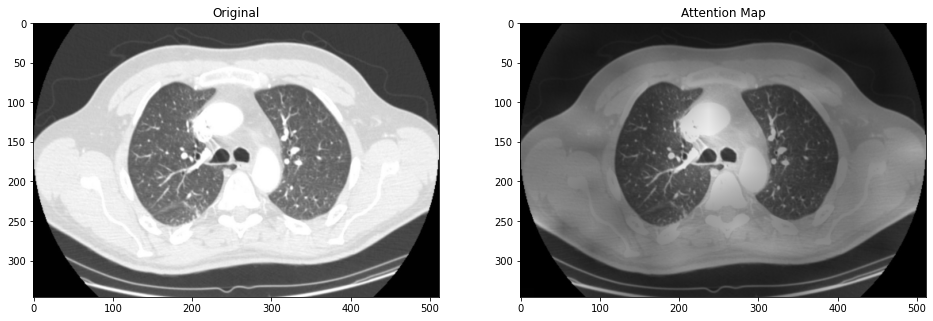

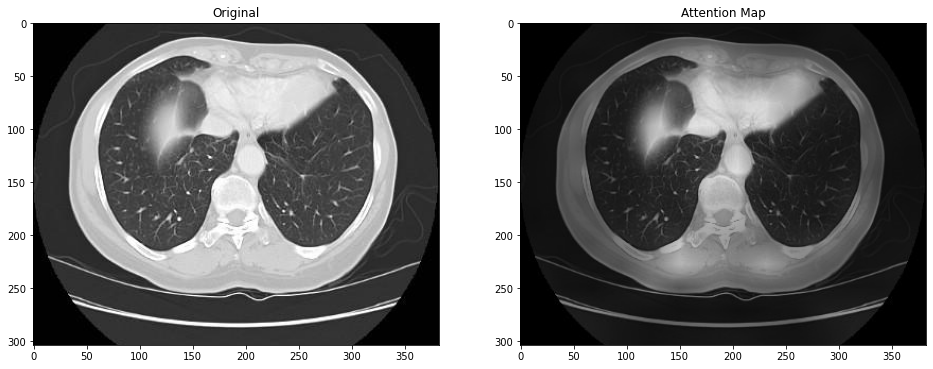

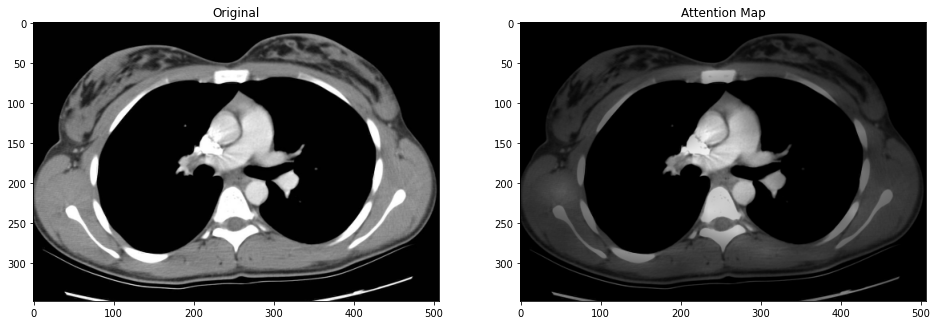

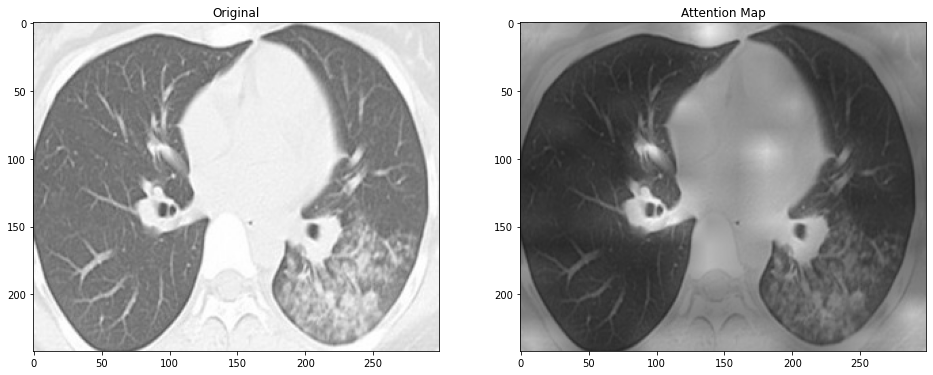

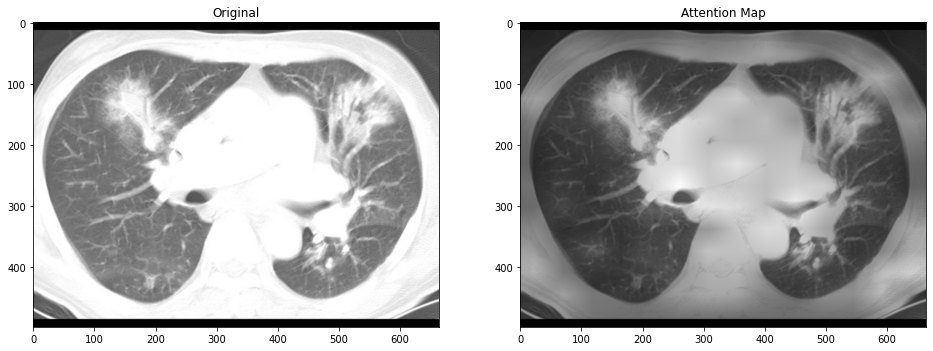

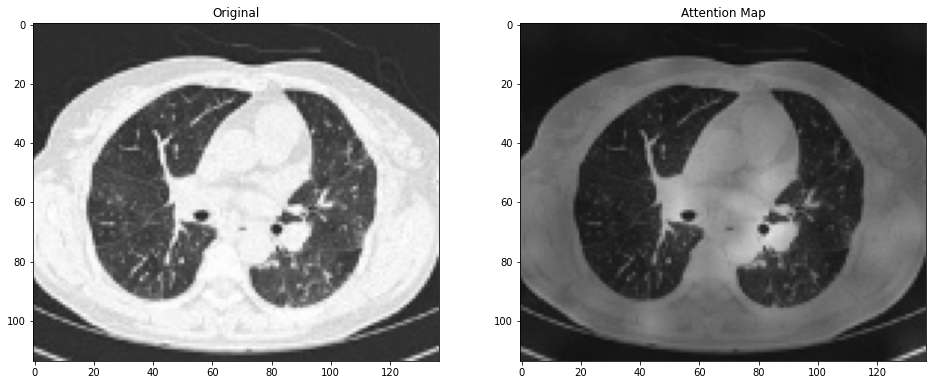

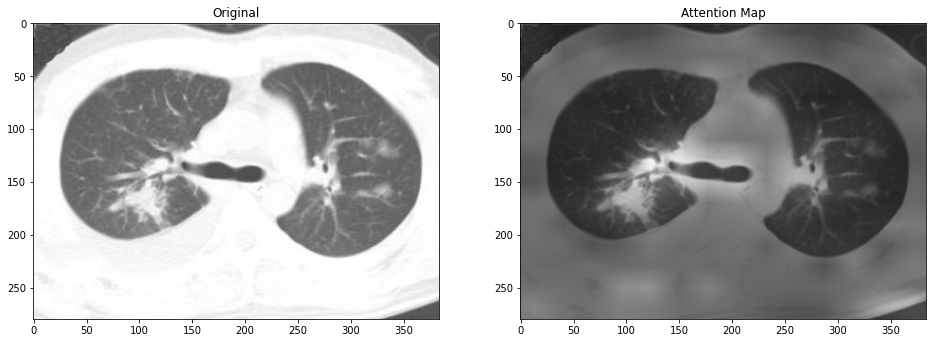

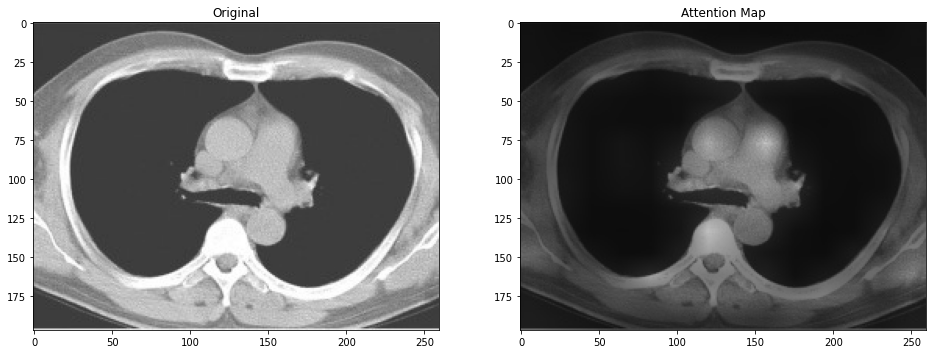

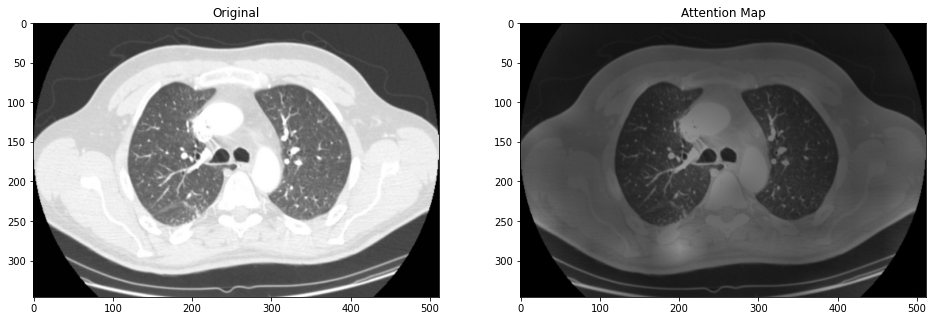

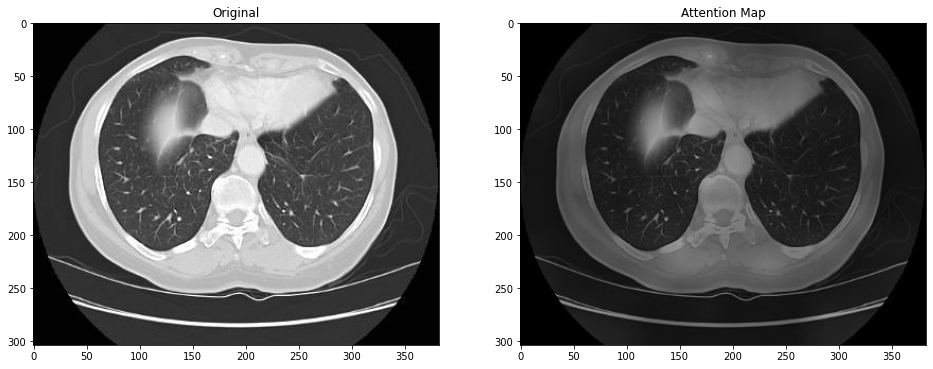

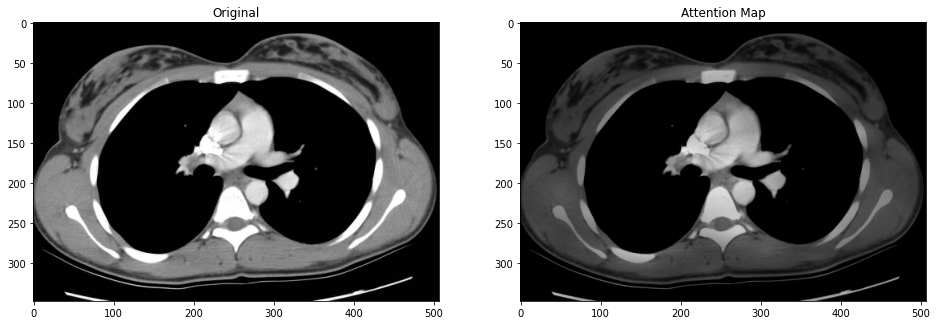

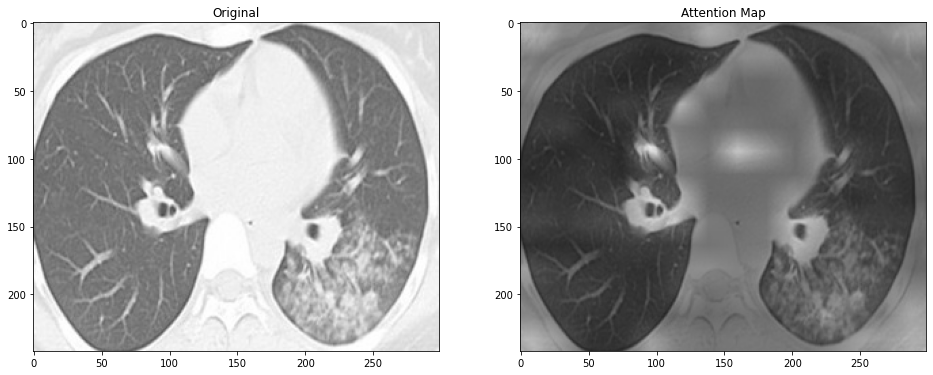

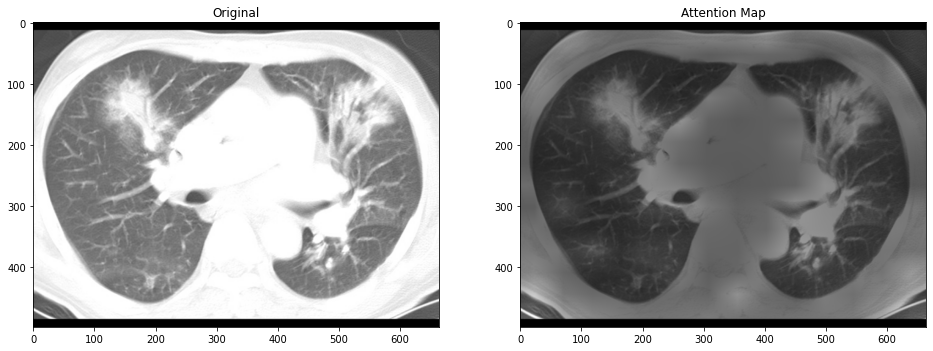

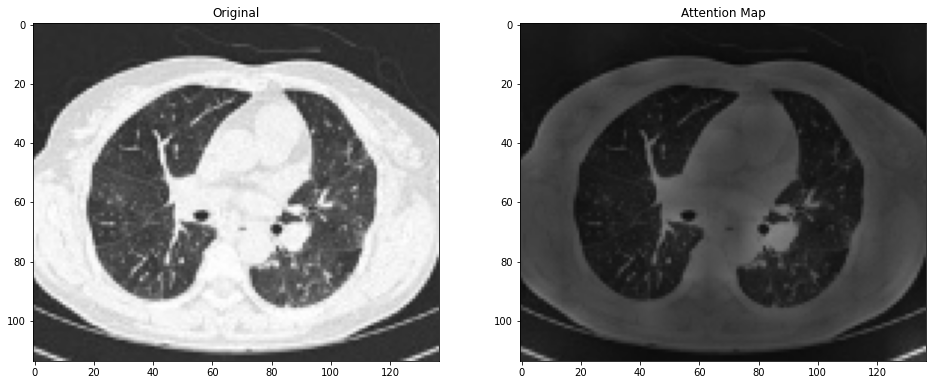

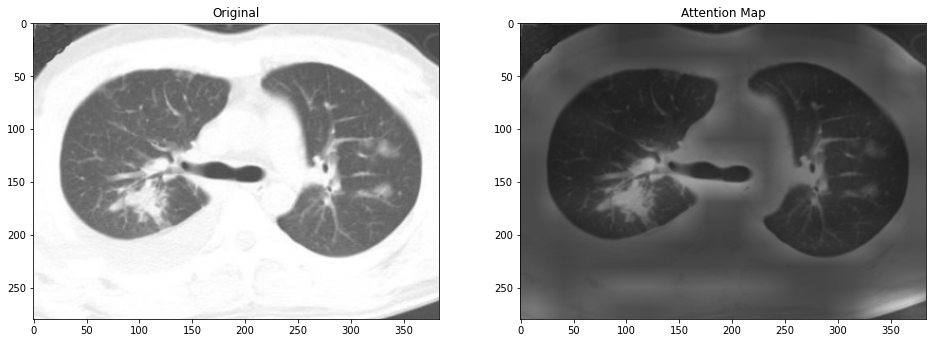

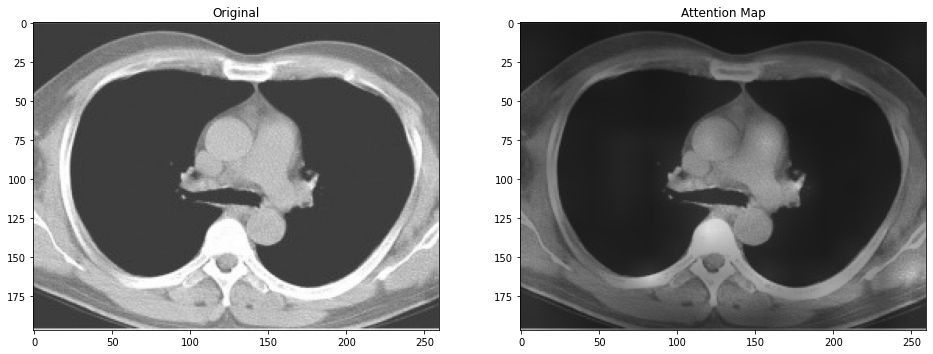

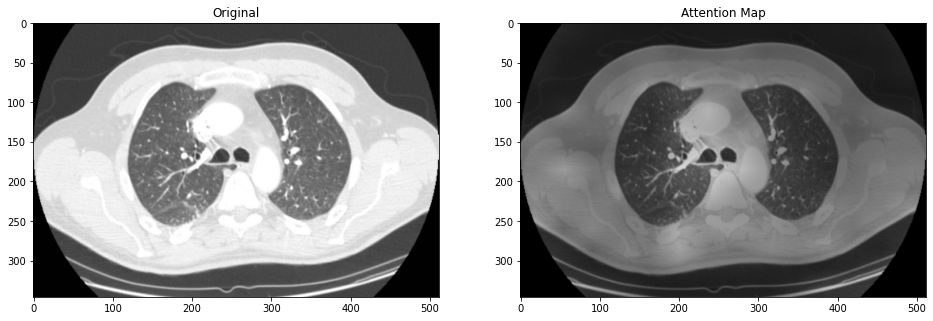

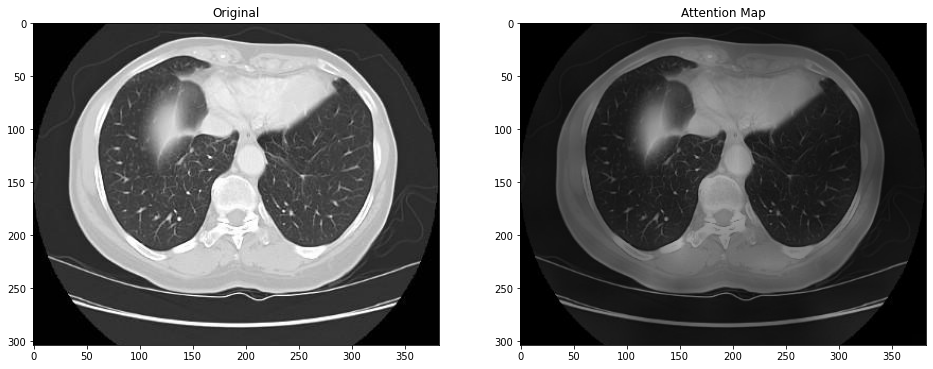

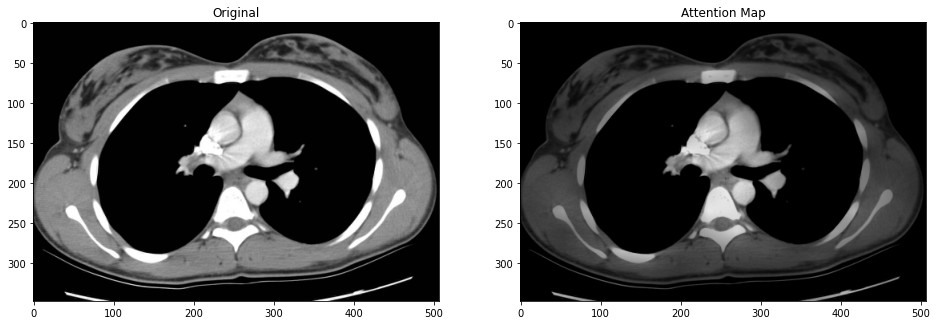

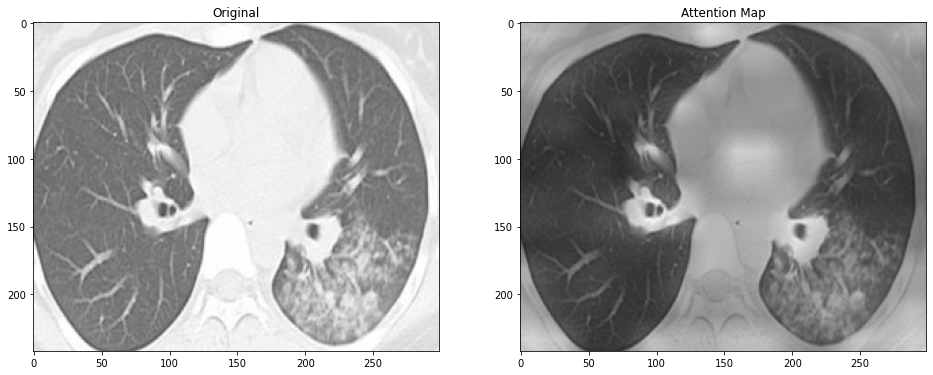

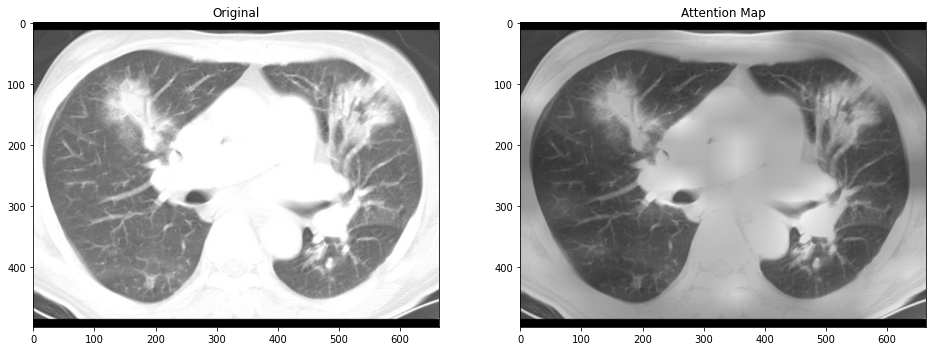

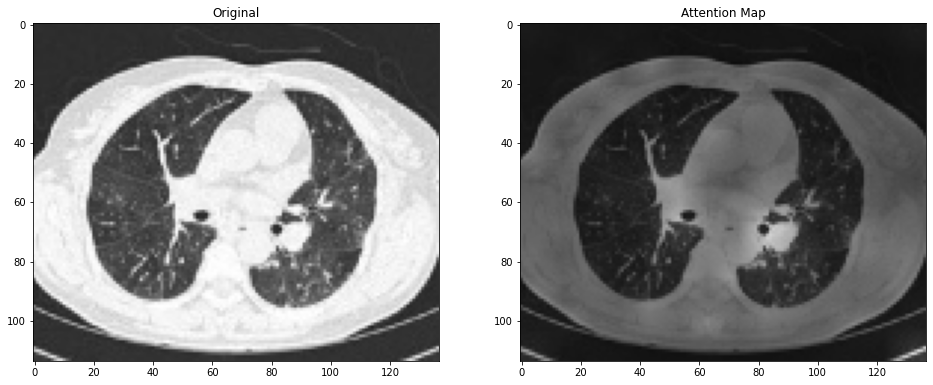

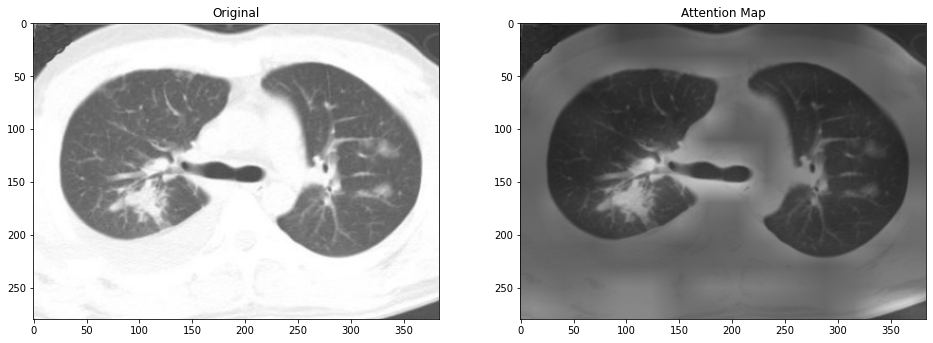

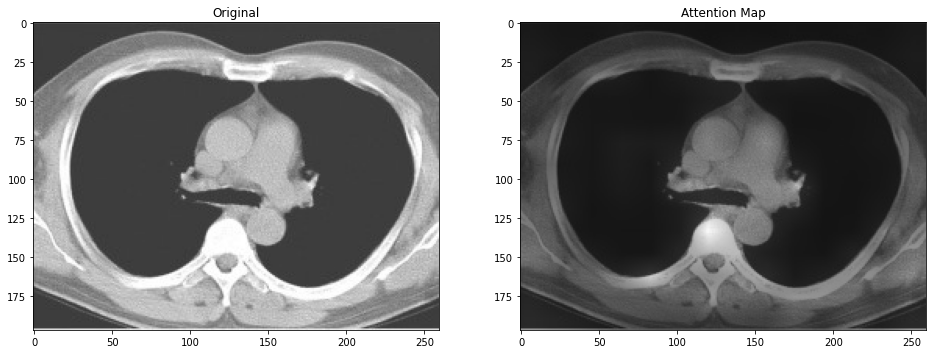

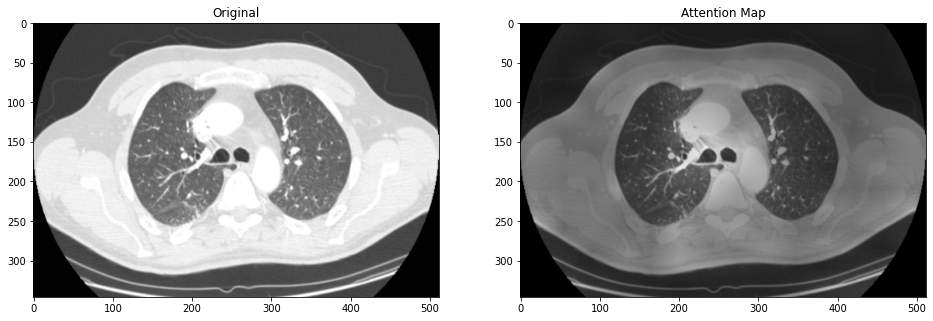

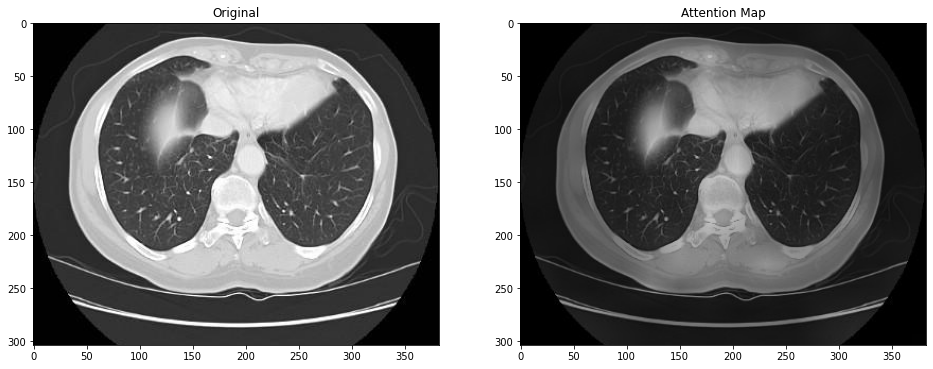

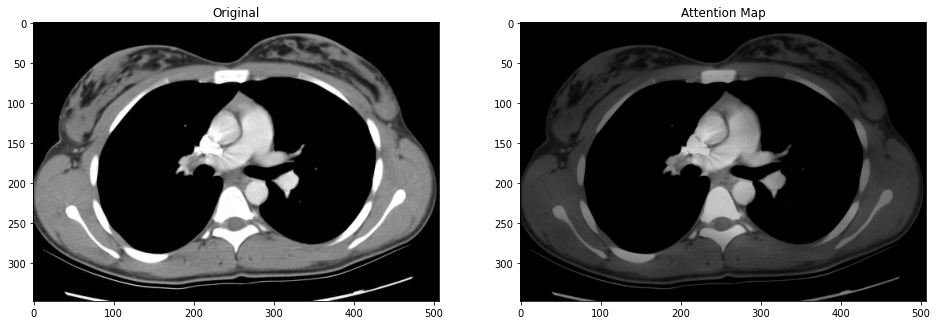

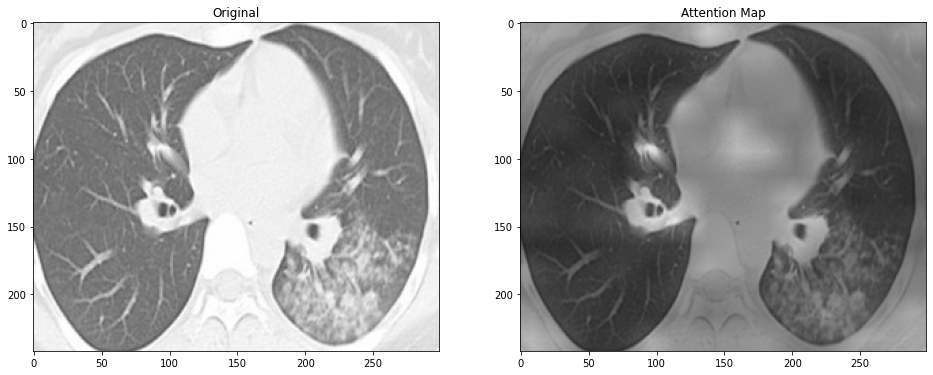

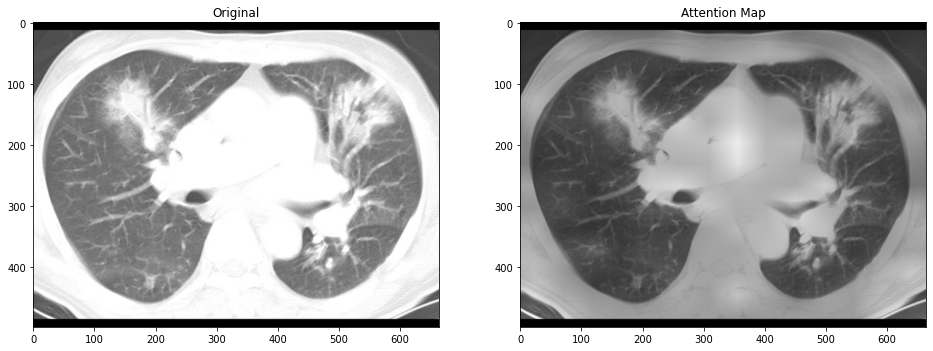

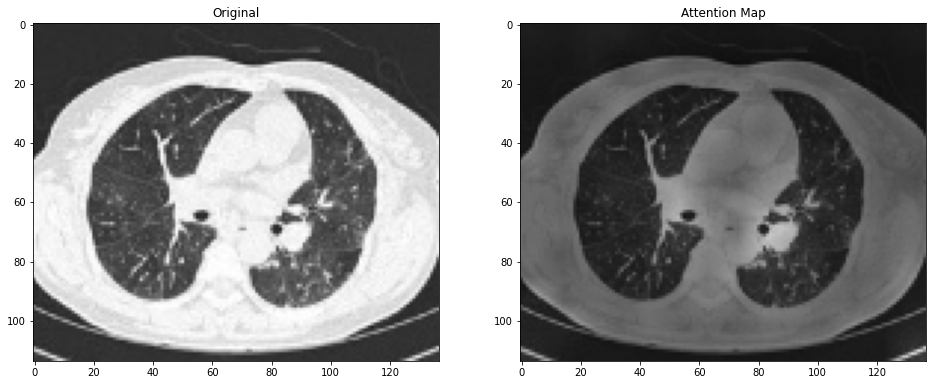

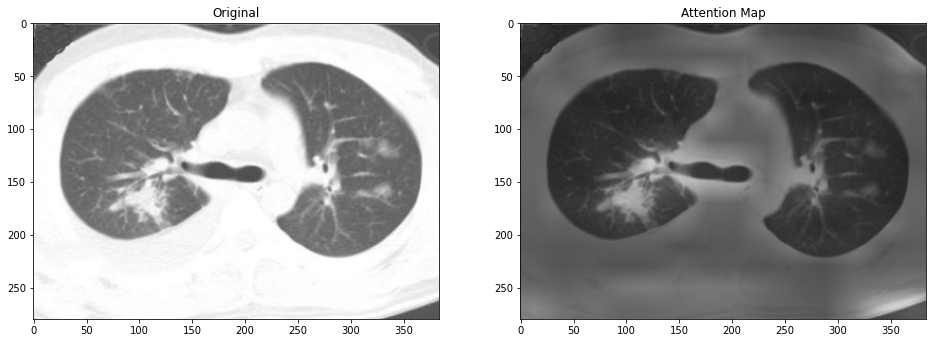

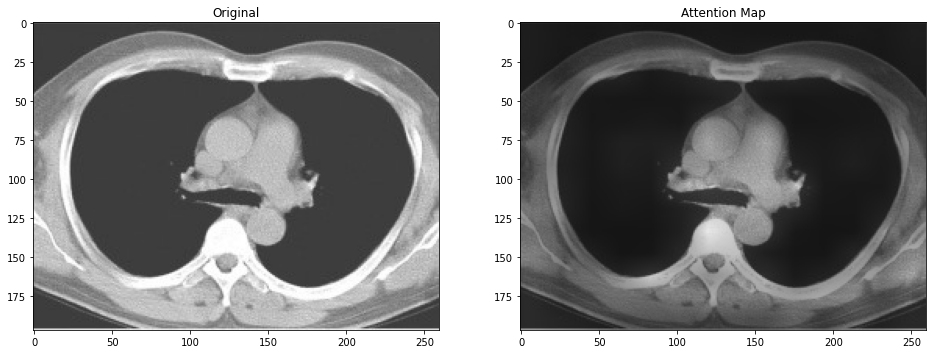

In [89]:
import numpy as np
import cv2
def visualize(img,vit_model):

  dir = img.split(".")[0]+"/"+vit_model

  os.makedirs(dir, exist_ok=True)

  config = CONFIGS["ViT-B_16"]
  model = VisionTransformer(config, num_classes=100, zero_head=False, img_size=224, vis=True)
  # model.load_from(np.load("checkpoint/ViT-B_16.npz"))
  if vit_model != "no_gan":
    model.load_state_dict(torch.load("saved_models/git_with_"+str(vit_model)+"_b16_lr01_batch32_checkpoint.bin"))
  else:
    model.load_state_dict(torch.load("saved_models/git_b16_lr01_batch32_checkpoint.bin"))

  #model.to(device)
  model.eval()

  transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
  ])
  im = Image.open(img).convert('RGB')
  x = transform(im)
  x.size()

  labels = ['covid', 'noncovid']

  #x = x.to(device)

  logits, att_mat = model(x.unsqueeze(0))

  att_mat = torch.stack(att_mat).squeeze(1)

  # Average the attention weights across all heads.
  att_mat = torch.mean(att_mat, dim=1)

  # To account for residual connections, we add an identity matrix to the
  # attention matrix and re-normalize the weights.
  residual_att = torch.eye(att_mat.size(1))
  aug_att_mat = att_mat + residual_att
  aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

  # Recursively multiply the weight matrices
  joint_attentions = torch.zeros(aug_att_mat.size())
  joint_attentions[0] = aug_att_mat[0]

  for n in range(1, aug_att_mat.size(0)):
      joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])
      
  # Attention from the output token to the input space.
  v = joint_attentions[-1]
  grid_size = int(np.sqrt(aug_att_mat.size(-1)))
  mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
  mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
  result = (mask * im).astype("uint8")

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

  ax1.set_title('Original')
  ax2.set_title('Attention Map')
  _ = ax1.imshow(im)
  _ = ax2.imshow(result)

  probs = torch.nn.Softmax(dim=-1)(logits)
  top5 = torch.argsort(probs, dim=-1, descending=True)
  print(img+": Prediction Label and Attention Map for model "+vit_model+"\n")
  for idx in top5[0, :1]:
      print(f'{probs[0, idx.item()]:.5f} : {labels[idx.item()]}', end='')


  for i, v in enumerate(joint_attentions):
      # Attention from the output token to the input space.
      mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
      mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
      result = (mask * im).astype("uint8")

      cv2.imwrite(dir+'/layer'+str(i)+'.png',result)



      # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))
      # ax1.set_title('Original')
      # ax2.set_title('Attention Map_%d Layer' % (i+1))
      # _ = ax1.imshow(im)
      # _ = ax2.imshow(result)


vit_models = ['sagan_resnet', 'sagan', 'acgan', 'bagan', "no_gan"]
for mod in vit_models:
  for i in range(8):
    visualize("img/noncovid-git/noncovid-git-"+str(i+1)+".png", mod)
